In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import random
import wget
import zipfile
from sklearn.model_selection import train_test_split 
from keras.utils import np_utils

In [2]:
url = "https://storage.googleapis.com/didow-ml-datasets/mnist-letter.zip"
if not os.path.exists('mnist-letter.zip'):
    filename = wget.download(url)

In [3]:
local_zip = 'mnist-letter.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./Dataset/')
zip_ref.close()

In [4]:
train = pd.read_csv('Dataset\emnist-letters-train.csv')
test = pd.read_csv('Dataset\emnist-letters-test.csv')

In [5]:
train_labels = np.array(train.iloc[:,0].values) - 1
train_letters = np.array(train.iloc[:,1:].values)

test_labels = np.array(test.iloc[:,0].values) - 1
test_letters = np.array(test.iloc[:,1:].values)

In [6]:
def reshape_normalize(data):
    data = data / 255.0
    data = data.reshape(-1, 28, 28, 1)
    return data

In [7]:
def flip_rotate(data):
    data = np.fliplr(data)
    data = np.rot90(data)
    return data 

In [8]:
x_train, x_val, y_train, y_val = train_test_split(train_letters,
                                                  train_labels,
                                                  test_size=0.2,
                                                  random_state=42)

In [9]:
x_train = reshape_normalize(x_train)
x_val = reshape_normalize(x_val)
test_letters = reshape_normalize(test_letters)

In [10]:
for i in range(len(x_train)):
    x_train[i] = flip_rotate(x_train[i])

for i in range(len(x_val)):
    x_val[i] = flip_rotate(x_val[i])

for i in range(len(test_letters)):
    test_letters[i] = flip_rotate(test_letters[i])

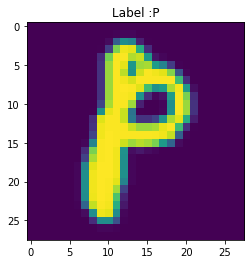

In [11]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

def show_image(image, label):
    image = image.reshape([28, 28])
    # image = np.fliplr(image)
    # image = np.rot90(image)
    plt.title('Label :' + letters[label])
    plt.imshow(image)

n = random.randint(0, len(x_train))
show_image(x_train[n], y_train[n])

In [12]:
y_train = np_utils.to_categorical(y_train, 26)
y_val = np_utils.to_categorical(y_val, 26)

In [13]:
print('training set: ', x_train.shape, y_train.shape)
print('validation set: ', x_val.shape, y_val.shape)
print('test set: ', test_letters.shape, test_labels.shape)

training set:  (71039, 28, 28, 1) (71039, 26)
validation set:  (17760, 28, 28, 1) (17760, 26)
test set:  (14799, 28, 28, 1) (14799,)


In [14]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32, 3, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [15]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=256, verbose=1)

Epoch 1/100
278/278 [==============================] - 3s 5ms/step - loss: 1.2247 - accuracy: 0.6330 - val_loss: 0.4413 - val_accuracy: 0.8637
Epoch 2/100
278/278 [==============================] - 1s 4ms/step - loss: 0.5953 - accuracy: 0.8132 - val_loss: 0.3290 - val_accuracy: 0.8936
Epoch 3/100
278/278 [==============================] - 1s 4ms/step - loss: 0.4834 - accuracy: 0.8464 - val_loss: 0.2865 - val_accuracy: 0.9082
Epoch 4/100
278/278 [==============================] - 1s 4ms/step - loss: 0.4316 - accuracy: 0.8627 - val_loss: 0.2702 - val_accuracy: 0.9126
Epoch 5/100
278/278 [==============================] - 1s 4ms/step - loss: 0.3993 - accuracy: 0.8723 - val_loss: 0.2533 - val_accuracy: 0.9173
Epoch 6/100
278/278 [==============================] - 1s 4ms/step - loss: 0.3701 - accuracy: 0.8816 - val_loss: 0.2462 - val_accuracy: 0.9180
Epoch 7/100
278/278 [==============================] - 1s 4ms/step - loss: 0.3517 - accuracy: 0.8872 - val_loss: 0.2361 - val_accuracy: 0.9219

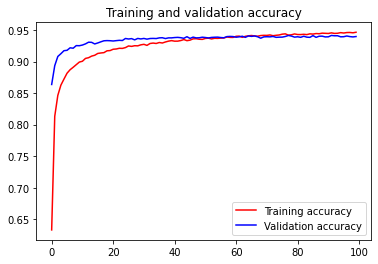

<Figure size 432x288 with 0 Axes>

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

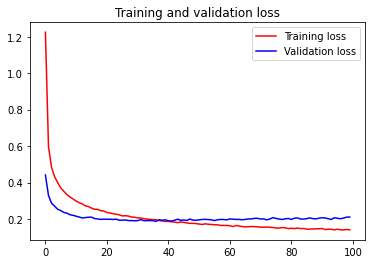

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [18]:
test_loss, test_accuracy = model.evaluate(x_val, y_val, verbose = 2)

print("Test Loss: ",test_loss)
print("Test Accuracy: ",test_accuracy)

555/555 - 1s - loss: 0.2106 - accuracy: 0.9398 - 859ms/epoch - 2ms/step
Test Loss:  0.21060265600681305
Test Accuracy:  0.9398085474967957


1/1 [==============================] - 0s 12ms/step


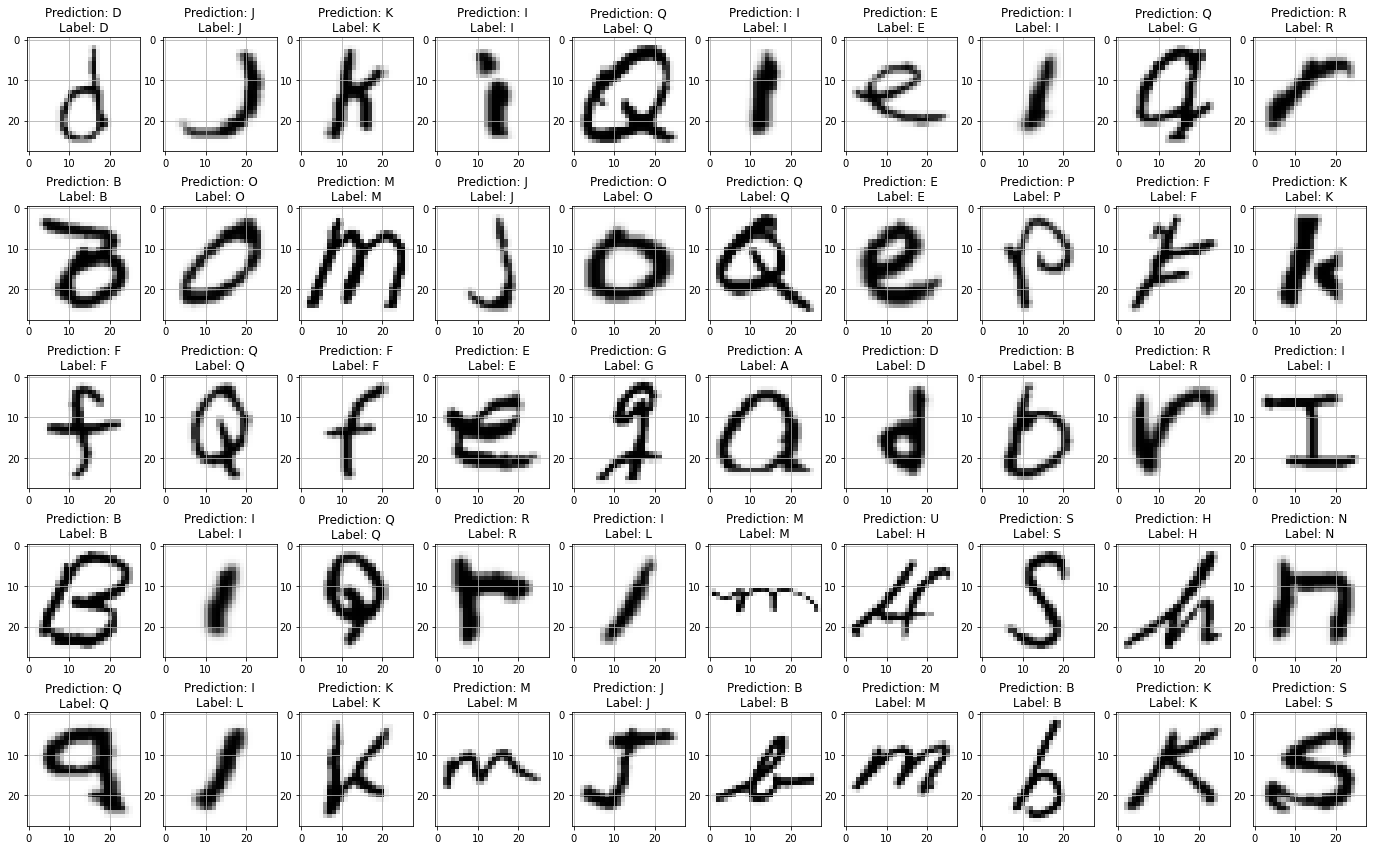

In [19]:
fig, axes = plt.subplots(5,10, figsize=(24,15))
axes = axes.flatten()

for i,ax in enumerate(axes):
    n = random.randint(0, len(test_letters))
    img = np.reshape(test_letters[n], (28,28))
    # img = np.fliplr(img)
    # img = np.rot90(img)
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = letters[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: {}\nLabel: {}".format(pred,letters[test_labels[n]]))
    ax.grid()

In [21]:
model_version = '2'
model_name = 'emnist'
file_name = 'emnist_model'
file_path = "./Model/{}/{}/{}".format(model_name, model_version, file_name)
model.save(file_path+'.h5')

In [22]:
tf.saved_model.save(model, file_path)

INFO:tensorflow:Assets written to: ./Model/emnist/2/emnist_model\assets


INFO:tensorflow:Assets written to: ./Model/emnist/2/emnist_model\assets
